# Notebook implementing and testing MLE

Goal of this notebook is to gain understanding of the MLE Procedure 

https://polaris000.medium.com/understanding-maximum-likelihood-estimation-e63dff65e5b1

## What is MLE? 

Maximum Likelihood Esimation is the procedure of estimating some distributions parameters given data from that distribution. So if we have n samples from a normal distribution (or any other) without knowing the parameters such as mean and standard deviation, we can estimate their most likely values. 

### Obtaining the data

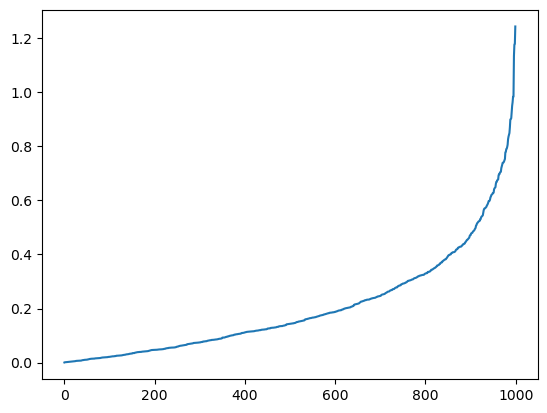

In [235]:
import numpy as np 
import matplotlib.pyplot as plt 

data = np.random.exponential(scale=1/5, size=(1000))

plt.plot(np.sort(data))


Asuming the distribution our data is drawn from we can find a joint distribution.

We here assume, correctly, exponential distribution, meaning our $\theta$ variables are only $\lambda$

$f_X (x) = \lambda e^{-\lambda*x} $

Likelihood of a given datapoint $x_i$ is $L(\lambda | x_i) = f(x_i | \lambda) = f(x_i) $

We find the Likelihood of each of our datapoint 

$L(\lambda | x_i) = \lambda e^{-\lambda x_i}$

We assume each point is sampled independently, meaning all points are from the same distribution and we can find the joint distribution by multiplying. 

$L(\lambda | x_1 , x_2 , ... , x_n) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i}$

This gives us our function to maximize wrt to $\lambda$

In [222]:
def L_prod(data, func, **params):
    """
    Calculating the Likelihood of joint probability given probability density function and parameters
    """ 
    y = func(data, **params)
    y = np.prod(y)
    return y

def L_sum(data, func, **params): 
    """
    Calculating the Log-Likelihood of joint probability given probability density function and parameters
    """ 
    y = np.log(func(data, **params))
    y = np.sum(y)
    return y


def exponential(data, theta): 
    return theta*np.exp(-(theta*data))
    

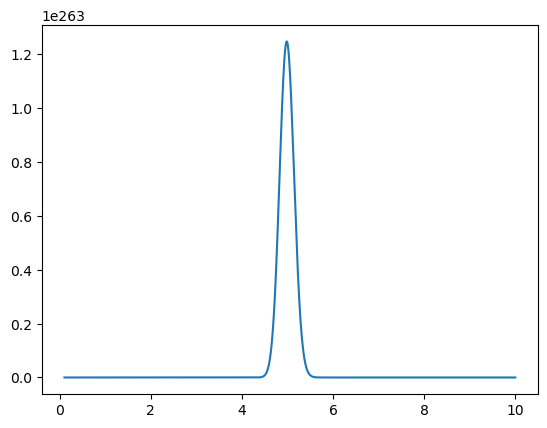

In [223]:
n_thetas = 5000
thetas = np.linspace(0.1, 10, n_thetas)

likelihoods = [L_prod(data, exponential, theta=thetas[i]) for i in range(n_thetas)]
plt.plot(thetas, likelihoods)


In [224]:
maxima_idx = np.argmax(likelihoods)
mle_theta = thetas[maxima_idx]
mle_theta

4.9816763352670534

### Motivating Log-Likelihood 
As we can see with alot of samples, continously multiplying values below 1 gives very small results, tending to zero. This is a fault of the method, and can be solved by taking the log of the likelihood function. Doing this turns the product into a sum, and keeps the maxima the same in both cases. 

Thus we avoid floating point errors and makes the whole computation simpler

$Log(L(\lambda | x_1 , x_2 , ... , x_n)) = log(\prod_{i=1}^{n} \lambda e^{-\lambda x_i}) = n log(\lambda) - \lambda \sum x_i$

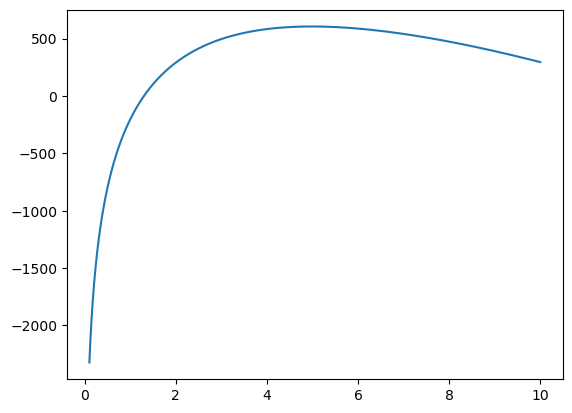

In [225]:
n_thetas = 5000
thetas = np.linspace(0.1, 10, n_thetas)

likelihoods = [L_sum(data, exponential, theta=thetas[i]) for i in range(n_thetas)]
plt.plot(thetas, likelihoods)

To find the maximum we can calculate the derivative and find an expression for when it equals zero. Doing this numerically however can be done as here, finding the maximum by calculating samples. 

In [226]:
maxima_idx = np.argmax(likelihoods)
mle_theta = thetas[maxima_idx]
mle_theta

4.9816763352670534

As conclusion we found MLE estimate of the lambda parameter in the exponential distribution to be 4.95, corresponding to 5 in our original data sampling. 

Note that numpy use the inverse, so $\beta = 1/5 <=> \lambda = 5$

## Same procedure, different distribution

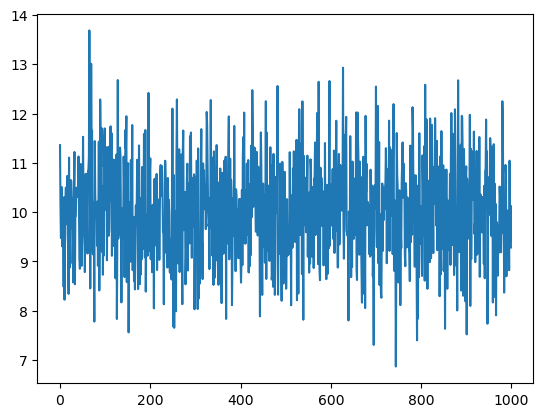

In [227]:
data = np.random.normal(loc = 10, scale=1, size=(1000))
plt.plot(data)


In [228]:
def normal(data, loc, scale): 
    
    const = 1/(np.sqrt(2*np.pi*scale**2))
    factor = np.exp(-(data-loc)**2 / (2*scale**2))

    return const*factor


In [230]:
n_loc = 500
n_scale = 500

locations = np.linspace(0.1, 10, n_loc)
scales = np.linspace(0.1, 2, n_scale)

xx, yy = np.meshgrid(locations, scales, indexing="ij")
likelihoods = np.zeros_like(xx)

for i in range(n_loc): 
    for j in range(n_scale): 

        likelihoods[i, j] = (L_sum(data, normal, loc=locations[i], scale=scales[j]))


/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_34222/1944245452.py:13: RuntimeWarning: divide by zero encountered in log
  y = np.log(func(data, **params))


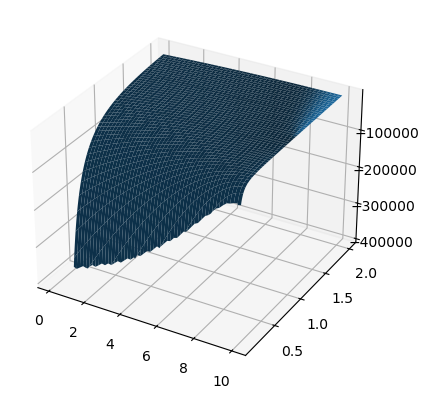

In [231]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, (likelihoods))
plt.show()


In [234]:
max_idx = np.argmax(likelihoods)

scales[maxima_idx//500], locations[maxima_idx%500]

(0.11523046092184369, 9.325450901803608)

Finding 0.11 as our MLE scale and 9.32 as our MLE location

As we can see, MLE has to do search for maximum in a parameter space. Thus, we are prone to problems as in minimizing optimization problems. 

* we can have several maxima/ minima 
* solutions may not exist or be infinitely "far away" 

In this procedure, we implemented parametric MLE, meaning we assume what distribution we have prior to estimation. If we dont know, we may use other methods. 